In [16]:
import GMH
import numpy as np
import matplotlib.pyplot as plt

q = GMH.MCMC.GaussianKernel(lambda x:x, lambda x:np.eye(x.shape[0]))
Sigma = np.eye(2)
Sigma[0, 0] = 10.0
pi = GMH.MCMC.Gaussian_distrib(np.zeros(2), Sigma)

AttributeError: module 'GMH' has no attribute 'MCMC'

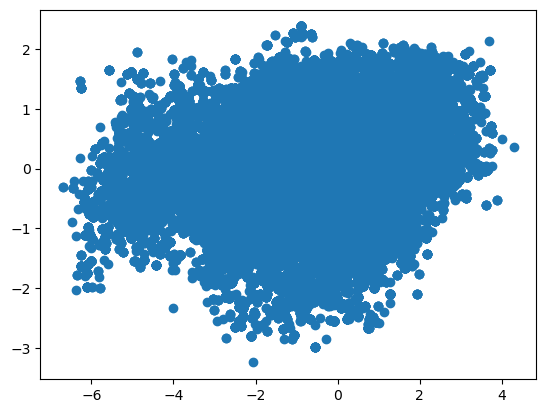

In [7]:
sample = np.array(GMH.MCMC.Generalized_Metropolis_Hastings(pi, q, np.zeros(2), 5000, 20))
plt.plot(sample[:,0], sample[:,1], "o")
plt.show()

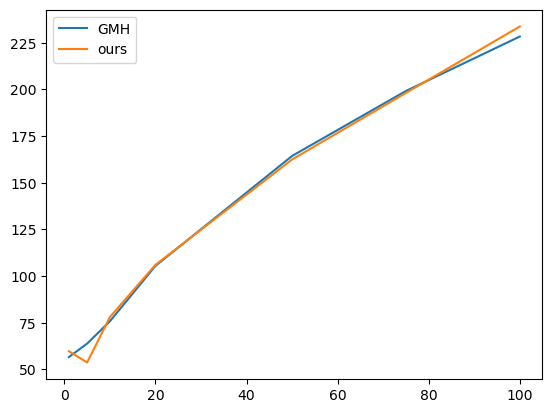

In [14]:
N = [1, 5, 10, 20, 50, 75, 100]
ess = []
ess_true = []
for proposals in N:
    sample = np.array(GMH.MCMC.Generalized_Metropolis_Hastings(pi, q, np.zeros(2), 500, proposals))
    true_sample = np.array(GMH.MCMC.Truly_Generalized_Metropolis_Hastings(pi, q, np.zeros(2), 500, proposals))
    ess.append(GMH.tools.multiESS(sample))
    ess_true.append(GMH.tools.multiESS(true_sample))

plt.plot(N, ess, label="GMH")
plt.plot(N, ess_true, label="ours")
plt.legend(loc="best")
plt.show()